In [2]:
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 253.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.5 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 8.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 3.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 4.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from file
df = pd.read_csv('pods.csv')
df = df.loc[df['namespace'] == 'media-microservices'].reset_index(drop=True)
# df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms') 
min_time = df['timestamp'].min()
df['timestamp'] = df['timestamp'] - min_time

In [39]:
df

,timestamp,namespace,pod,cpu,memory
0,5559,media-microservices,cast-info-memcached-56b648cb4-274nc,1.549752,1822720.0
1,13210,media-microservices,cast-info-mongodb-566f5887c-vqzp6,53.432357,20885504.0
2,6999,media-microservices,cast-info-service-7ccdbff8-zf45m,0.332293,2658304.0
3,7383,media-microservices,compose-review-memcached-598d9dc6cd-cq2dm,1.508671,2101248.0
4,7337,media-microservices,compose-review-service-76ccb99f59-dgdcn,0.064992,1560576.0
...,...,...,...,...,...
4186,11308,media-microservices,user-mongodb-6964d5bb96-9nrsv,55.639543,26005504.0
4187,4430,media-microservices,user-review-mongodb-85ccc4bd6f-nx6pm,177.193419,144867328.0
4188,11062,media-microservices,user-review-redis-558f76b88b-njhbf,29.254814,3842048.0
4189,7383,media-microservices,user-review-service-66659b79cd-vhxwz,91.373853,13053952.0


In [40]:
df["timestamp"]

0        5559
1       13210
2        6999
3        7383
4        7337
        ...  
4186    11308
4187     4430
4188    11062
4189     7383
4190     6398
Name: timestamp, Length: 4191, dtype: int64

In [41]:
pods = df['pod'].unique()

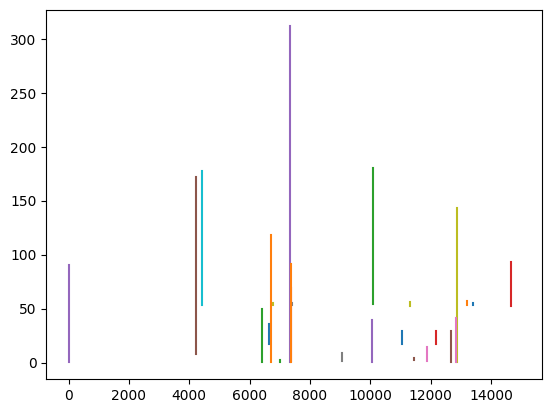

In [42]:
for pod in pods:
    df_pod = df.loc[df['pod'] == pod]
    plt.plot(df_pod['timestamp'], df_pod['cpu'], label=pod)